### **Postavka Julie u Google Colab**

Potrebno je preuzeti ovaj notebook, upload-ovati ga i pokrenuti kôd ispod prilikom kreiranja notebook-a za sve vježbe. Nakon pokretanja, potrebno je restartovati notebook. U *Runtime* kliknite na *Change runtime type* i odaberite Juliu i GPU. Sada možete koristiti Juliu za sve što radite.



In [ ]:
!curl -sSL "https://julialang-s3.julialang.org/bin/linux/x64/1.5/julia-1.5.2-linux-x86_64.tar.gz" -o julia.tar.gz
!tar -xzf julia.tar.gz -C /usr --strip-components 1
!rm -rf julia.tar.gz*
!julia -e 'using Pkg; pkg"add IJulia; precompile"'
!echo "DONE"

LoadError: ignored

# **Laboratorijska vježba 1: Uvod u Juliu**

Pretraga dokumentacije:

In [ ]:
?sin

search: sin sinh sind sinc sinpi sincos sincosd SingularException asin using



```
sin(x)
```

Compute sine of `x`, where `x` is in radians.

---

```
sin(A::AbstractMatrix)
```

Compute the matrix sine of a square matrix `A`.

If `A` is symmetric or Hermitian, its eigendecomposition ([`eigen`](@ref)) is used to compute the sine. Otherwise, the sine is determined by calling [`exp`](@ref).

# Examples

```jldoctest
julia> sin(fill(1.0, (2,2)))
2×2 Array{Float64,2}:
 0.454649  0.454649
 0.454649  0.454649
```


In [ ]:
?ln

search: println length LinRange LinearIndices LinearAlgebra LineNumberNode Clong

Couldn't find ln
Perhaps you meant lq, lu, In, in, LQ, LU, lq!, lu!, lcm, log, let, all or cld


No documentation found.

Binding `ln` does not exist.


In [ ]:
?log

search: log log2 log1p log10 logdet logabsdet Clong Clonglong Culong Culonglong



```
log(b,x)
```

Compute the base `b` logarithm of `x`. Throws [`DomainError`](@ref) for negative [`Real`](@ref) arguments.

# Examples

```jldoctest; filter = r"Stacktrace:(\n \[[0-9]+\].*)*"
julia> log(4,8)
1.5

julia> log(4,2)
0.5

julia> log(-2, 3)
ERROR: DomainError with -2.0:
log will only return a complex result if called with a complex argument. Try log(Complex(x)).
Stacktrace:
 [1] throw_complex_domainerror(::Symbol, ::Float64) at ./math.jl:31
[...]

julia> log(2, -3)
ERROR: DomainError with -3.0:
log will only return a complex result if called with a complex argument. Try log(Complex(x)).
Stacktrace:
 [1] throw_complex_domainerror(::Symbol, ::Float64) at ./math.jl:31
[...]
```

!!! note
    If `b` is a power of 2 or 10, [`log2`](@ref) or [`log10`](@ref) should be used, as these will typically be faster and more accurate. For example,

    ```jldoctest
    julia> log(100,1000000)
    2.9999999999999996

    julia> log10(1000000)/2
    3.0
    ```


---

```
log(x)
```

Compute the natural logarithm of `x`. Throws [`DomainError`](@ref) for negative [`Real`](@ref) arguments. Use complex negative arguments to obtain complex results.

# Examples

```jldoctest; filter = r"Stacktrace:(\n \[[0-9]+\].*)*"
julia> log(2)
0.6931471805599453

julia> log(-3)
ERROR: DomainError with -3.0:
log will only return a complex result if called with a complex argument. Try log(Complex(x)).
Stacktrace:
 [1] throw_complex_domainerror(::Symbol, ::Float64) at ./math.jl:31
[...]
```

---

```
log(A{T}::StridedMatrix{T})
```

If `A` has no negative real eigenvalue, compute the principal matrix logarithm of `A`, i.e. the unique matrix $X$ such that $e^X = A$ and $-\pi < Im(\lambda) < \pi$ for all the eigenvalues $\lambda$ of $X$. If `A` has nonpositive eigenvalues, a nonprincipal matrix function is returned whenever possible.

If `A` is symmetric or Hermitian, its eigendecomposition ([`eigen`](@ref)) is used, if `A` is triangular an improved version of the inverse scaling and squaring method is employed (see [^AH12] and [^AHR13]). For general matrices, the complex Schur form ([`schur`](@ref)) is computed and the triangular algorithm is used on the triangular factor.

[^AH12]: Awad H. Al-Mohy and Nicholas J. Higham, "Improved inverse  scaling and squaring algorithms for the matrix logarithm", SIAM Journal on Scientific Computing, 34(4), 2012, C153-C169. [doi:10.1137/110852553](https://doi.org/10.1137/110852553)

[^AHR13]: Awad H. Al-Mohy, Nicholas J. Higham and Samuel D. Relton, "Computing the Fréchet derivative of the matrix logarithm and estimating the condition number", SIAM Journal on Scientific Computing, 35(4), 2013, C394-C410. [doi:10.1137/120885991](https://doi.org/10.1137/120885991)

# Examples

```jldoctest
julia> A = Matrix(2.7182818*I, 2, 2)
2×2 Array{Float64,2}:
 2.71828  0.0
 0.0      2.71828

julia> log(A)
2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0
```


1. Izračunati vrijednosti izraza:

*   $3\cdot\frac{456}{23}+31.54+2^6$
*   $sin(\frac{\pi}{7})\cdot e^{0.3}\cdot(2+0.9i)$
*   $\sqrt{2}\cdot\ln{10}$
*   $\frac{5+3i}{1.2+4.5i}$

In [ ]:
3*456/23+31.54+2^6

155.0182608695652

In [ ]:
sin(pi/7)*exp(0.3)*2(2+0.9*im)

2.3427271468473787 + 1.0542272160813204im

In [ ]:
sqrt(2)*log(10)

3.256347067030294

In [ ]:
(5+3*im)/(1.2+4.5im)

0.8990318118948823 - 0.8713692946058091im

2. Dodijeliti varijablama $a, b, c$ i $d$ respektivno vrijednosti:

$\frac{arctg(5)+e^{5.6}}{3}$,
$\sqrt[15]{\sin{\frac{\pi}{3}}}$,
$\frac{\ln{15}+1}{23}$,
$\sin{\frac{\pi}{2}}+\cos{\pi}$

a potom izračunati:

*   $(a+b)c$
*   $arccos(b)\cdot arcsin(\frac{c}{11})$
*   $\frac{(a-b)^4}{d}$
*   $\sqrt[a]{c}+\frac{bi}{3+2i}$




In [ ]:
a=(atan(5)+exp(5.6))/3

90.59993606436585

In [ ]:
b=sin(pi/3)^(1/15)

0.9904564292877371

In [ ]:
c=(log(15)+1)/23

0.16121957396096565

In [ ]:
d=sin(pi/2)+cos(pi)

0.0

In [ ]:
(a+b)*c

14.766164056744456

In [ ]:
acos(b)*asin(c/11)

0.0020265488574442185

In [ ]:
(a-b)^4/d

Inf

In [ ]:
c^(1/a)+b*im/(3+2*im)

1.132436064542125 + 0.22856686829717013im

**Potreban paket LinearAlgebra**

3. Varijabli $A$ dodijeliti matricu:

$\begin{bmatrix}
1 & -4i & \sqrt{2}\\
ln(-1) & \sin{\frac{\pi}{2}} & \cos{\frac{\pi}{3}}\\
arcsin(0.5) & arccos(0.8)  & e^{0.8}
\end{bmatrix}$

a zatim izračunati:

*   Transponovanu matricu od A
*   Zbir matrice A i njene transponovane matrice
*   Proizvod matrice A i njene transponovane matrice
*   Proizvod transponovane matrice i matrice A
*   Determinantu od A
*   Inverznu matricu od A


In [ ]:
log(-1)

LoadError: ignored

In [ ]:
A=[1 -4*im sqrt(2); log(Complex(-1)) sin(pi/2) cos(pi/3); asin(0.5) acos(0.8) exp(0.8)]

3×3 Array{Complex{Float64},2}:
      1.0+0.0im           0.0-4.0im  1.41421+0.0im
      0.0+3.14159im       1.0+0.0im      0.5+0.0im
 0.523599+0.0im      0.643501+0.0im  2.22554+0.0im

Uvodimo paket LinearAlgebra radi predefinisanih operatora i funkcija.

In [ ]:
using LinearAlgebra

Transponovana i konjugovano-kompleksna:

In [ ]:
A'

3×3 Adjoint{Complex{Float64},Array{Complex{Float64},2}}:
     1.0-0.0im  0.0-3.14159im  0.523599-0.0im
     0.0+4.0im  1.0-0.0im      0.643501-0.0im
 1.41421-0.0im  0.5-0.0im       2.22554-0.0im

Transponovana

In [ ]:
transpose(A)

3×3 Transpose{Complex{Float64},Array{Complex{Float64},2}}:
     1.0+0.0im  0.0+3.14159im  0.523599+0.0im
     0.0-4.0im  1.0+0.0im      0.643501+0.0im
 1.41421+0.0im  0.5+0.0im       2.22554+0.0im

In [ ]:
A+transpose(A)

3×3 Array{Complex{Float64},2}:
     2.0+0.0im          0.0-0.858407im  1.93781+0.0im
     0.0-0.858407im     2.0+0.0im        1.1435+0.0im
 1.93781+0.0im       1.1435+0.0im       4.45108+0.0im

In [ ]:
A*transpose(A)

3×3 Array{Complex{Float64},2}:
    -13.0+0.0im       0.707107-0.858407im  3.67099-2.574im
 0.707107-0.858407im   -8.6196+0.0im       1.75627+1.64493im
  3.67099-2.574im      1.75627+1.64493im   5.64128+0.0im

In [ ]:
transpose(A)*A

3×3 Array{Complex{Float64},2}:
 -8.59545+0.0im       0.336936-0.858407im   2.5795+1.5708im
 0.336936-0.858407im  -14.5859+0.0im       1.93214-5.65685im
   2.5795+1.5708im     1.93214-5.65685im   7.20303+0.0im

In [ ]:
det(A)

-26.803662240458614 + 1.8118025457470748im

In [ ]:
inv(A)

3×3 Array{Complex{Float64},2}:
 -0.0707042-0.00477927im    -0.01145-0.332899im    0.0475012+0.0778275im
 -0.0272749+0.259007im    -0.0551531-0.00372809im  0.0297227-0.163747im
  0.0245208-0.0737657im     0.018641+0.0793984im    0.429559+0.0290362im

In [ ]:
?pinv

search: pinv print println pointer printstyled pointer_from_objref sprint



```
pinv(M; atol::Real=0, rtol::Real=atol>0 ? 0 : n*ϵ)
pinv(M, rtol::Real) = pinv(M; rtol=rtol) # to be deprecated in Julia 2.0
```

Computes the Moore-Penrose pseudoinverse.

For matrices `M` with floating point elements, it is convenient to compute the pseudoinverse by inverting only singular values greater than `max(atol, rtol*σ₁)` where `σ₁` is the largest singular value of `M`.

The optimal choice of absolute (`atol`) and relative tolerance (`rtol`) varies both with the value of `M` and the intended application of the pseudoinverse. The default relative tolerance is `n*ϵ`, where `n` is the size of the smallest dimension of `M`, and `ϵ` is the [`eps`](@ref) of the element type of `M`.

For inverting dense ill-conditioned matrices in a least-squares sense, `rtol = sqrt(eps(real(float(one(eltype(M))))))` is recommended.

For more information, see [^issue8859], [^B96], [^S84], [^KY88].

# Examples

```jldoctest
julia> M = [1.5 1.3; 1.2 1.9]
2×2 Array{Float64,2}:
 1.5  1.3
 1.2  1.9

julia> N = pinv(M)
2×2 Array{Float64,2}:
  1.47287   -1.00775
 -0.930233   1.16279

julia> M * N
2×2 Array{Float64,2}:
 1.0          -2.22045e-16
 4.44089e-16   1.0
```

[^issue8859]: Issue 8859, "Fix least squares", [https://github.com/JuliaLang/julia/pull/8859](https://github.com/JuliaLang/julia/pull/8859)

[^B96]: Åke Björck, "Numerical Methods for Least Squares Problems",  SIAM Press, Philadelphia, 1996, "Other Titles in Applied Mathematics", Vol. 51. [doi:10.1137/1.9781611971484](http://epubs.siam.org/doi/book/10.1137/1.9781611971484)

[^S84]: G. W. Stewart, "Rank Degeneracy", SIAM Journal on Scientific and Statistical Computing, 5(2), 1984, 403-413. [doi:10.1137/0905030](http://epubs.siam.org/doi/abs/10.1137/0905030)

[^KY88]: Konstantinos Konstantinides and Kung Yao, "Statistical analysis of effective singular values in matrix rank determination", IEEE Transactions on Acoustics, Speech and Signal Processing, 36(5), 1988, 757-763. [doi:10.1109/29.1585](https://doi.org/10.1109/29.1585)


4. Generisati matrice:

*   matricu dimenzija $8x9$ čiji su svi elementi nule
*   matricu dimenzija $7x5$ čiji su svi elementi jedinice
*   matricu dimenzija $5x5$ čiji su elementi glavne dijagonale jednaki 1, a ostali elementi jednaki 0 (jedinična matrica)
*   generisati nasumičnu matricu dimenzija $4x9$




In [ ]:
zeros(8,9)

8×9 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [ ]:
ones(7,5)

7×5 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0

In [ ]:
I(5)

5×5 Diagonal{Bool,Array{Bool,1}}:
 1  ⋅  ⋅  ⋅  ⋅
 ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  ⋅  1  ⋅
 ⋅  ⋅  ⋅  ⋅  1

In [ ]:
I(5)+zeros(5,5)

5×5 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0

In [ ]:
randn(4,9)

4×9 Array{Float64,2}:
  0.812657   0.781838   1.46623   …   0.374523  -0.0228295  -1.02587
 -0.715159   1.2387     0.153798      2.10418   -0.575799    1.0653
 -0.482591  -0.738093   0.173866      0.661519  -1.81445     2.13668
 -0.363685  -0.0362862  0.882811     -0.452346  -0.551495    0.799144

**5**. Izračunati zbir elemenata po svim redovima, kolonama i dijagonalama, te odrediti minimalne i maksimalne elemente po svim redovima, kolonama i dijagonalama sljedeće matrice:

$a=$ $\begin{bmatrix}
2 & 7 & 6\\
9 & 5 & 1\\
4 & 3  & 8
\end{bmatrix}$



In [ ]:
a=[2 7 6; 9 5 1; 4 3 8]

3×3 Array{Int64,2}:
 2  7  6
 9  5  1
 4  3  8

In [ ]:
transpose(a)

In [ ]:
sum(a)

45

In [ ]:
sum(a,dims=1)

1×3 Array{Int64,2}:
 15  15  15

In [ ]:
sum(a,dims=2)

3×1 Array{Int64,2}:
 15
 15
 15

In [ ]:
tr(a)

15

In [ ]:
tr(rotl90(a))

15

In [ ]:
minimum(a,dims=1)

1×3 Array{Int64,2}:
 2  3  1

In [ ]:
minimum(a,dims=2)

3×1 Array{Int64,2}:
 2
 1
 3

In [ ]:
minimum(diag(a))

2

In [ ]:
minimum(diag(rotl90(a)))

4

In [ ]:
maximum(a,dims=1)

1×3 Array{Int64,2}:
 9  7  8

In [ ]:
maximum(a,dims=2)

3×1 Array{Int64,2}:
 7
 9
 8

In [ ]:
maximum(diag(a))

8

In [ ]:
maximum(diag(rotl90(a)))

6

6. Neka je:

$a=$ $\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8  & 9
\end{bmatrix}$, 
$b=$ $\begin{bmatrix}
1 & 1 & 1\\
2 & 2 & 2\\
3 & 3  & 3
\end{bmatrix}$

Kako na najjednostavniji način izračunati matricu $c$ dimenzija $3x3$ tako da:

*   svaki element matrice $c$ bude jednak sinusu odgovarajućeg elementa matrice $a$ 
*   svaki element matrice $c$ bude jednak sinusu odgovarajućeg elementa matrice $a$ pomnoženog s kosinusom odgovarajućeg elementa matrice $b$
*   matrica $c$ bude jednaka trećem korijenu matrice $a$
*   svaki element matrice c bude jednak trećem korijenu odgovarajućeg elementa matrice $a$.

Posljednja dva zadatka uraditi s matricom čiji elementi imaju cjelobrojnu vrijednost trećeg korijena.



In [ ]:
a=[1 2 3; 4 5 6; 7 8 9]
b=[1 1 1; 2 2 2; 3 3 3]

3×3 Array{Int64,2}:
 1  1  1
 2  2  2
 3  3  3

In [ ]:
c=sin.(a)

3×3 Array{Float64,2}:
  0.841471   0.909297   0.14112
 -0.756802  -0.958924  -0.279415
  0.656987   0.989358   0.412118

In [ ]:
c=sin.(a).*cos.(b)

3×3 Array{Float64,2}:
  0.454649   0.491295   0.0762475
  0.314941   0.399053   0.116278
 -0.650412  -0.979457  -0.407994

In [ ]:
c=(a^3)^(1/3)

3×3 Array{Complex{Float64},2}:
 2.20838+0.697666im    2.3278+0.189242im   2.44726-0.319115im
 4.13339+0.0769953im  5.03621+0.0209376im  5.93897-0.0352517im
 6.05843-0.543609im   7.74455-0.147499im   9.43071+0.248678im

In [ ]:
c=(a.^3).^(1/3)

3×3 Array{Float64,2}:
 1.0  2.0  3.0
 4.0  5.0  6.0
 7.0  8.0  9.0

7. Formirati vektore:

*   vektor red koji ima 100 elemenata: 0,1,2,...,99
*   vektor red koji ima 100 elemenata: 0,0.01,0.02,...,0.99
*   vektor kolonu koja ima 20 elemenata i to 39,37,35,...,5,3,1



Range:

In [ ]:
0:99

0:99

Range u vektor:

In [ ]:
[0:99;]'

1×100 Adjoint{Int64,Array{Int64,1}}:
 0  1  2  3  4  5  6  7  8  9  10  11  …  91  92  93  94  95  96  97  98  99

In [ ]:
[0:0.01:0.99;]'

1×100 Adjoint{Float64,Array{Float64,1}}:
 0.0  0.01  0.02  0.03  0.04  0.05  …  0.94  0.95  0.96  0.97  0.98  0.99

In [ ]:
[39:-2:1;]

20-element Array{Int64,1}:
 39
 37
 35
 33
 31
 29
 27
 25
 23
 21
 19
 17
 15
 13
 11
  9
  7
  5
  3
  1

8. Varijabli $a$ na najjednostavniji način pridružiti matricu:

$\begin{bmatrix}
7 & 7 & 7 & 7 & 0 & 0 & 0 & 0\\
7 & 7 & 7 & 7 & 0 & 0 & 0 & 0\\
7 & 7 & 7 & 7 & 0 & 0 & 0 & 0\\
7 & 7 & 7 & 7 & 0 & 0 & 0 & 0\\
3 & 3 & 3 & 3 & 3 & 3 & 3 & 3\\
3 & 3 & 3 & 3 & 3 & 3 & 3 & 3\\
3 & 3 & 3 & 3 & 3 & 3 & 3 & 3\\
3 & 3 & 3 & 3 & 3 & 3 & 3 & 3\\
\end{bmatrix}$

*   Varijabli $b$ pridružiti matricu koja se dobije kada se matrica identiteta sabere s matricom $a$.
*   Varijabli $c$ pridružiti matricu koja se dobije kada se iz matrice $b$ izostavi svaki drugi red.
*   Varijabli $d$ pridružiti matricu koja se dobije kada se iz matrice $b$ izostavi svaka druga kolona.
*   Varijabli $e$ pridružiti matricu koja se dobije kada se iz matrice $b$ izostavi svaki drugi red i svaka druga kolona.

In [ ]:
a=[7*ones(4,4) zeros(4,4); 3*ones(4,8)]

8×8 Array{Float64,2}:
 7.0  7.0  7.0  7.0  0.0  0.0  0.0  0.0
 7.0  7.0  7.0  7.0  0.0  0.0  0.0  0.0
 7.0  7.0  7.0  7.0  0.0  0.0  0.0  0.0
 7.0  7.0  7.0  7.0  0.0  0.0  0.0  0.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0

In [ ]:
b=I(8)+a

8×8 Array{Float64,2}:
 8.0  7.0  7.0  7.0  0.0  0.0  0.0  0.0
 7.0  8.0  7.0  7.0  0.0  0.0  0.0  0.0
 7.0  7.0  8.0  7.0  0.0  0.0  0.0  0.0
 7.0  7.0  7.0  8.0  0.0  0.0  0.0  0.0
 3.0  3.0  3.0  3.0  4.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  4.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  4.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  4.0

In [ ]:
c=b[1:2:8,:]

4×8 Array{Float64,2}:
 8.0  7.0  7.0  7.0  0.0  0.0  0.0  0.0
 7.0  7.0  8.0  7.0  0.0  0.0  0.0  0.0
 3.0  3.0  3.0  3.0  4.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  4.0  3.0

In [ ]:
d=b[:,1:2:8]

8×4 Array{Float64,2}:
 8.0  7.0  0.0  0.0
 7.0  7.0  0.0  0.0
 7.0  8.0  0.0  0.0
 7.0  7.0  0.0  0.0
 3.0  3.0  4.0  3.0
 3.0  3.0  3.0  3.0
 3.0  3.0  3.0  4.0
 3.0  3.0  3.0  3.0

In [ ]:
e=b[1:2:8,1:2:8]

4×4 Array{Float64,2}:
 8.0  7.0  0.0  0.0
 7.0  8.0  0.0  0.0
 3.0  3.0  4.0  3.0
 3.0  3.0  3.0  4.0

In [ ]:
c[2,:] = c[2,:] *2

8-element Array{Float64,1}:
 14.0
 14.0
 16.0
 14.0
  0.0
  0.0
  0.0
  0.0

In [ ]:
c

4×8 Array{Float64,2}:
  8.0   7.0   7.0   7.0  0.0  0.0  0.0  0.0
 14.0  14.0  16.0  14.0  0.0  0.0  0.0  0.0
  3.0   3.0   3.0   3.0  4.0  3.0  3.0  3.0
  3.0   3.0   3.0   3.0  3.0  3.0  4.0  3.0

## **Funkcije za crtanje**






**Potrebni paketi Plots**

**1**. Crtanje grafika jedne promjenljive:

*   Nacrtati grafik funkcije  $y=\sin{x}$ u intervalu $[-\pi,\pi]$ koristeći 101 tačku;
*   Nacrtati grafik funkcije  $y=\cos{x}$ u intervalu $[-\pi,\pi]$ koristeći 101 tačku;
*   Nacrtati grafik funkcije  $y=\sin{\frac{1}{x}}$ u intervalu $[1,10]$ koristeći 101 tačku. Grafik nacrtati punom crnom linijom;
*   Nacrtati grafik funkcije  $y=\cos{\frac{1}{x}}$ u intervalu $[1,10]$ koristeći 101 tačku. Grafik nacrtati plavim kružićima, preko prethodnog grafika;
*   Nacrtati funkcije 1 i 2 na istom grafiku, ali različitim bojama i tipom linije.

In [ ]:
import Pkg; 
Pkg.add("Plots")

  Resolving package versions...
  Installed FreeType2_jll ──────────────── v2.10.1+5
  Installed Xorg_libXau_jll ────────────── v1.0.9+4
  Installed DataValueInterfaces ────────── v1.0.0
  Installed EarCut_jll ─────────────────── v2.1.5+1
  Installed Measures ───────────────────── v0.3.1
  Installed Adapt ──────────────────────── v3.3.1
  Installed Missings ───────────────────── v1.0.2
  Installed Plots ──────────────────────── v1.23.1
  Installed Xorg_libxcb_jll ────────────── v1.13.0+3
  Installed Requires ───────────────────── v1.1.3
  Installed Ogg_jll ────────────────────── v1.3.4+2
  Installed JpegTurbo_jll ──────────────── v2.0.1+3
  Installed Xorg_libXrender_jll ────────── v0.9.10+4
  Installed Opus_jll ───────────────────── v1.3.1+3
  Installed Xorg_libXi_jll ─────────────── v1.7.10+4
  Installed Gettext_jll ────────────────── v0.20.1+7
  Installed LaTeXStrings ───────────────── v1.2.1
  Installed Xorg_libXrandr_jll ─────────── v1.5.2+4
  Installed Xorg_libpthread_stubs_jll ──

In [ ]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


┌ Info: Precompiling GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9]
└ @ Base loading.jl:1278
ERROR: LoadError: LoadError: InitError: could not load library "/root/.julia/artifacts/a84cc58d5161b950f268bb562e105bbbf4d6004a/lib/libGL.so"
/root/.julia/artifacts/a84cc58d5161b950f268bb562e105bbbf4d6004a/lib/libGL.so: undefined symbol: _glapi_tls_Current
Stacktrace:
 [1] dlopen(::String, ::UInt32; throw_error::Bool) at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Libdl/src/Libdl.jl:109
 [2] dlopen(::String, ::UInt32) at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Libdl/src/Libdl.jl:109
 [3] macro expansion at /root/.julia/packages/JLLWrappers/bkwIo/src/products/library_generators.jl:54 [inlined]
 [4] __init__() at /root/.julia/packages/Libglvnd_jll/pJrjy/src/wrappers/x86_64-linux-gnu.jl:22
 [5] _include_from_serialized(::String, ::Array{Any,1}) at ./loading.jl:697
 [6] _require_from_serialized(::String) at ./loading.jl:749
 [7] _require(::Base

Your GR installation is incomplete. Rerunning build step for GR package.


┌ Error: Error importing GR_jll:
│   err = ErrorException("Failed to precompile GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9] to /root/.julia/compiled/v1.5/GR_jll/jV9xf_xOUNF.ji.")
└ @ GR /root/.julia/packages/GR/Pwj8N/src/funcptrs.jl:42
┌ Info: Switching provider to GR due to error in depsfile
│   depsfile = /root/.julia/packages/GR/Pwj8N/deps/deps.jl
└ @ GR /root/.julia/packages/GR/Pwj8N/src/GR.jl:353
┌ Info: Emptying depsfile. GR provider is GR
│   provider = GR
│   depsfile = /root/.julia/packages/GR/Pwj8N/deps/deps.jl
└ @ GR.Builder /root/.julia/packages/GR/Pwj8N/deps/build.jl:128
┌ Info: Downloading pre-compiled GR 0.61.0 Ubuntu binary
└ @ GR.Builder /root/.julia/packages/GR/Pwj8N/deps/build.jl:193


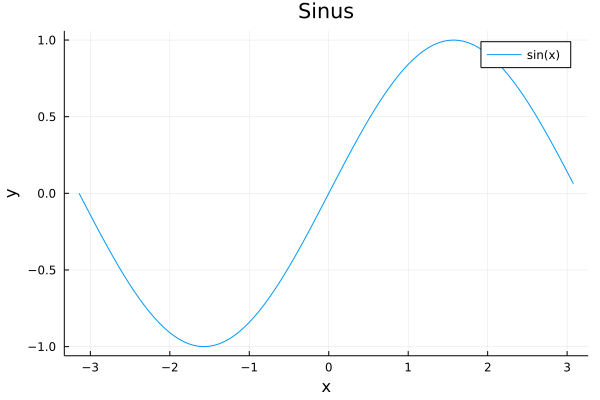

┌ Info: GR was successfully rebuilt
└ @ GR /root/.julia/packages/GR/Pwj8N/src/GR.jl:362


In [ ]:
x=[-pi:pi/50:pi;];
y=sin.(x)
plot(x,y,title = "Sinus", label = "sin(x)")
xlabel!("x")
ylabel!("y")

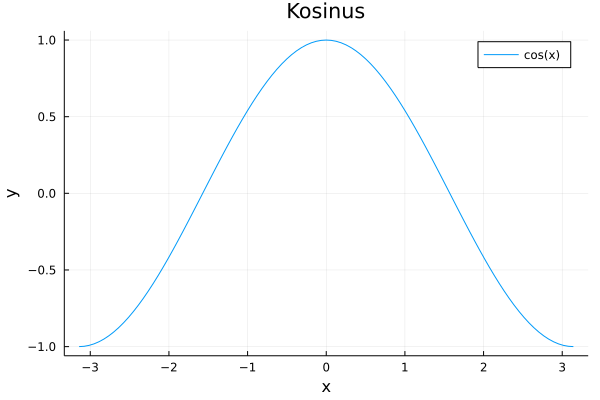

In [ ]:
x=range(-pi,stop=pi,length=101);
y=cos.(x);
plot(x,y,title = "Kosinus", label = "cos(x)")
xlabel!("x")
ylabel!("y")

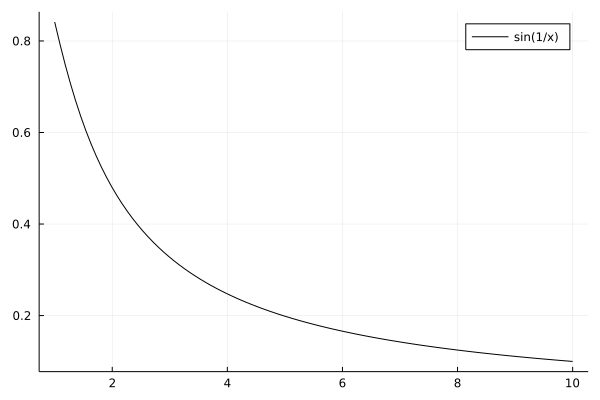

In [ ]:
x=range(1,stop=10,length=101);
y=sin.(1 ./ x);
plot(x,y,color=:black, label = "sin(1/x)")

In [ ]:
x1=range(1,stop=10,length=101);
y1=cos.(1 ./ x1);
plot!(x1,y1,color=:blue,line=(:dot), label = "sin(1/x)")

SyntaxError: ignored

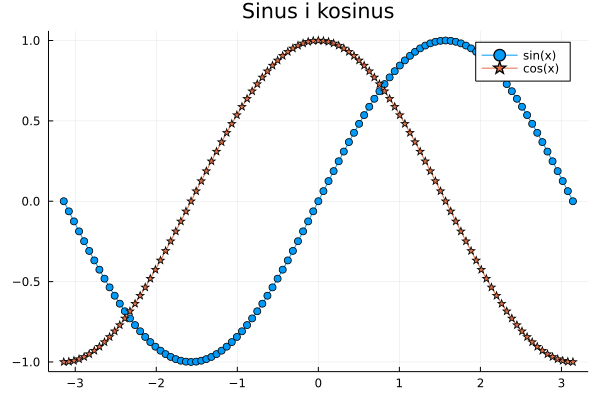

In [ ]:
x=range(-pi, π, length = 101)
y=[sin.(x) cos.(x)]
plot(x,y,shape = [:circle :star5], label = ["sin(x)" "cos(x)"])
title!("Sinus i kosinus")

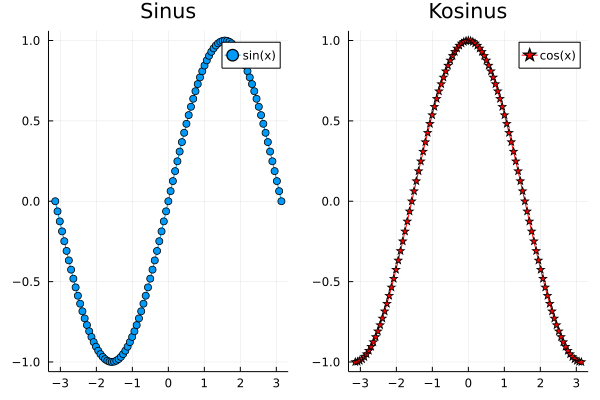

In [ ]:
x=range(-pi, π, length = 101)
y1=sin.(x);
y2=cos.(x);
p1=plot(x,y1,title="Sinus",shape=:circle,label="sin(x)");
p2=plot(x,y2,title="Kosinus",color=:red,shape=:star5,label="cos(x)");
plot(p1,p2,layout=(1,2))

2. Nacrtati grafik funkcije $z=\sin{\sqrt{x^2+y^2}}$ iznad površine $x,y\in[-8,8]$, koristeći mrežu gustine 0.5.

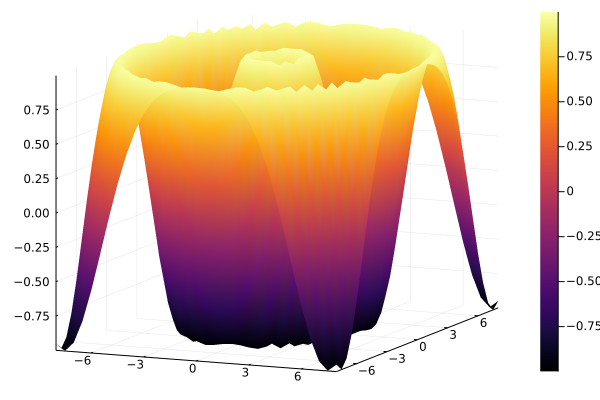

In [ ]:
x, y = -8:0.5:8, -8:0.5:8
z(x,y) = sin.(sqrt.(x.^2+y.^2))
surface(x,y,z, st=:surface)

## **Julia funkcije, metaprogramiranje i GUI**





1. Napisati funkciju koja vrši sabiranje i oduzimanje dva proslijeđena argumenta, i vraća oba rezultata. Dodati provjeru broja argumenata. Ako argument nije proslijeđen, dodijeliti mu 0. Obzirom da argumenti mogu biti matrice, izvršite provjeru dimenzija. U slučaju da se dimenzije ne podudaraju vratiti rezultat 0. Potrebno je provjeriti rad funkcije.

In [ ]:
function zbir_razlika(x=0,y=0)
 if (size(x)===size(y))
  x + y, x-y
 else return (0,0)
 end
end

zbir_razlika (generic function with 3 methods)

In [ ]:
zbir_razlika([2;2])

(0, 0)

In [ ]:
zbir_razlika([1 2 3; 4 5 6],[1 2 3])

(0, 0)

In [ ]:
a,b=zbir_razlika(5,8)

(13, -3)

In [ ]:
a

13

In [ ]:
zbir_razlika([1 2 3; 1 2 3], [4 5 6; 4 5 6])

([5 7 9; 5 7 9], [-3 -3 -3; -3 -3 -3])

In [ ]:
zbir_razlika()

(0, 0)

2. Napisati funkciju koja vrši sabiranje svih elemenata proslijeđene matrice, sabiranje elemenata po redovima, kolonama i dijagonalama, te vraća odgovarajuće sume. Zadatak uradite bez korištenja predefinisanih funkcija. Potrebno je provjeriti rad funkcije.

In [ ]:
function sume(mat)
    suma_matrice=0
    suma_redova=zeros(size(mat,1))
    suma_kolona=zeros(size(mat,2))
    suma_diagonale=0
    suma_sporedne=0
    for i = 1:size(mat,1)
        for j = 1:size(mat,2)
           suma_matrice+=mat[i,j]
           suma_redova[i]+=mat[i,j]
           suma_kolona[j]+=mat[i,j]
           if size(mat,1) == size(mat,2)
              if i==j
                  suma_diagonale+=mat[i,j]
              end
              if (i + j) == (size(mat,1)+1)
                    suma_sporedne += mat[i,j]; 
              end
           end
        end
    end
    return suma_matrice,suma_redova,suma_kolona, suma_diagonale, suma_sporedne
end

sume (generic function with 1 method)

In [ ]:
sume([1 2 3; 4 5 6; 7 8 9])

(45, [6.0, 15.0, 24.0], [12.0, 15.0, 18.0], 15, 15)

In [ ]:
a=[2 7 6; 9 5 1; 4 3 8];
sume(a)

(45, [15.0, 15.0, 15.0], [15.0, 15.0, 15.0], 15, 15)

In [ ]:
sume(a[2,:])

NameError: ignored

In [ ]:
sume(a[1:2,1:2])

(23, [9.0, 14.0], [11.0, 12.0], 7, 16)

3. Napisati funkciju koja prima string koji je reprezentacija naredbe, te crta grafik proizvoljne funkcije jedne promjenljive.  Potrebno je iskoristiti odgovarajuće meta naredbe za evaluaciju string-a kao izraza/naredbe. U funkciji predvidjeti da broj tačaka intervala bude 100, te da se funkcija crta na intervalu [-5,-5].

In [ ]:
function crtaj(s::String)
global x=LinRange(-5,5,100)
x=[x;];
y = eval(Meta.parse(s))
plot(x,y)
end

crtaj (generic function with 1 method)

In [ ]:
function crtaj2(s::String)
x=LinRange(-5,5,100)
x=[x;];
f = eval(Meta.parse("(x) -> $s"))
y = Base.invokelatest(f,x)
plot(x,y)
end

crtaj2 (generic function with 1 method)

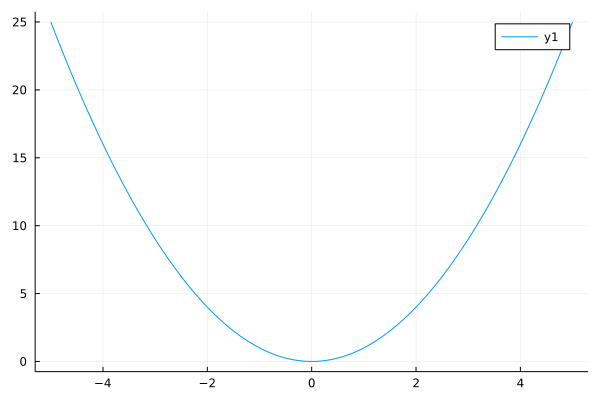

In [ ]:
crtaj("x.^2")

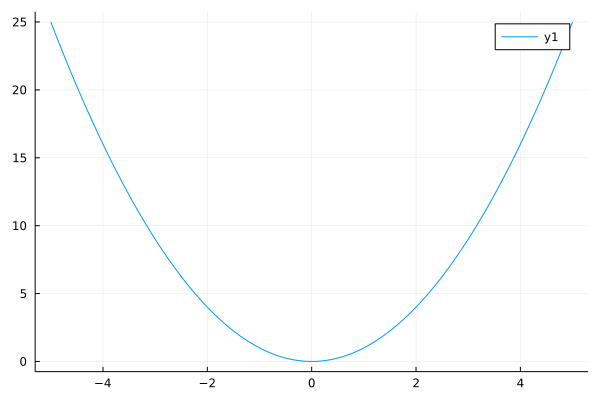

In [ ]:
crtaj2("x.^2")

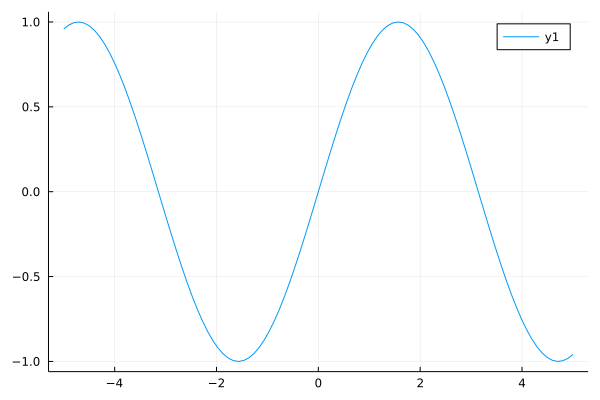

In [ ]:
crtaj("sin.(x)")

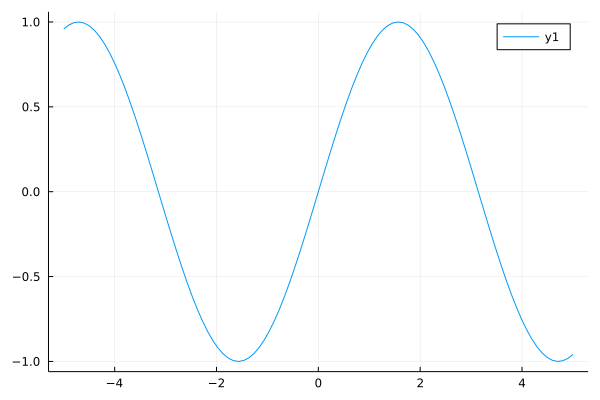

In [ ]:
crtaj2("sin.(x)")